In [33]:
import sys
import os

# Dynamically add the pykan package directory to the Python path
package_path = os.path.join(os.path.dirname(os.getcwd()), 'pykan')
sys.path.append(package_path)

In [34]:
os.getcwd()

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project\\Projet_individuel_KAN'

In [35]:
os.path.dirname(os.getcwd())

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project'

In [36]:
package_path

'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project\\pykan'

In [37]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
import numpy as np

In [38]:
winddata_path = os.path.join('..\\Liao_code','Task15_W_Zone6.csv')
data = pd.read_csv(winddata_path)
Y = data.iloc[:, 2].values.astype(np.float64)  
X = data.iloc[:, 3:7].values.astype(np.float64)


scaler = MinMaxScaler()
X= scaler.fit_transform(X)
split1 = int(0.1 * len(X))
split2 = int(0.9 * len(X))

X_train, y_train = X[:split1], Y[:split1]
X_val, y_val = X[split1:split2], Y[split1:split2]
X_test, y_test = X[split2:], Y[split2:]

ndarray_data = [X_train, y_train, X_val, y_val, X_test, y_test]
tensor_data_list = [torch.from_numpy(x) for x in ndarray_data]

tensor_data_list[1] = tensor_data_list[1].unsqueeze(1)  # y_train
tensor_data_list[3] = tensor_data_list[3].unsqueeze(1)  # y_val
tensor_data_list[5] = tensor_data_list[5].unsqueeze(1)  # y_test

# The KAN Class trains on train/validation called train_input/test_input
dataset = { 'train_input': tensor_data_list[0],
            'train_label': tensor_data_list[1],
            'test_input': tensor_data_list[2],
            'test_label': tensor_data_list[3],
            'true_test_input': tensor_data_list[4],
            'true_test_label': tensor_data_list[5]  }

dataset['train_input'].shape, dataset['train_label'].shape


(torch.Size([1680, 4]), torch.Size([1680, 1]))

In [39]:
from kan import *
torch.set_default_dtype(torch.float64)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# create a KAN: 2D inputs, 1D output, and 5 hidden neurons. cubic spline (k=3), 5 grid intervals (grid=5).
model = KAN(width=[4,1], grid=3, k=3, seed=42, device=device)

cpu
checkpoint directory created: ./model
saving model version 0.0


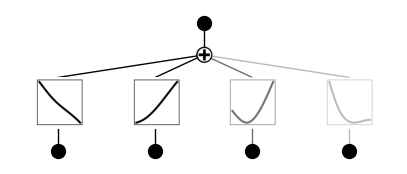

In [40]:
# plot KAN at initialization
model(tensor_data_list[0])
model.plot()

In [41]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.77e-01 | test_loss: 2.04e-01 | reg: 5.65e+00 | : 100%|█| 50/50 [00:10<00:00,  4.84it

saving model version 0.1


{'train_loss': [array(0.18065537),
  array(0.17672689),
  array(0.17677455),
  array(0.17606678),
  array(0.1766027),
  array(0.17658892),
  array(0.17669005),
  array(0.1767409),
  array(0.17672335),
  array(0.17652815),
  array(0.17648064),
  array(0.17647008),
  array(0.17646065),
  array(0.1764595),
  array(0.17646224),
  array(0.17645871),
  array(0.17650647),
  array(0.17651232),
  array(0.1765266),
  array(0.17657656),
  array(0.17654714),
  array(0.1765049),
  array(0.17645953),
  array(0.17642855),
  array(0.17648314),
  array(0.17646998),
  array(0.17645875),
  array(0.17650733),
  array(0.17650733),
  array(0.17651829),
  array(0.17652997),
  array(0.17652946),
  array(0.17651821),
  array(0.17651722),
  array(0.17651435),
  array(0.17651434),
  array(0.1765143),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  array(0.17651429),
  arr

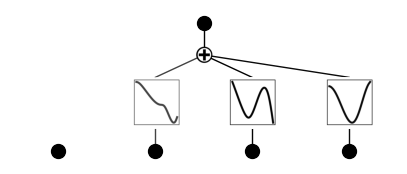

In [42]:
model.plot()

In [43]:
model = model.prune()

saving model version 0.2


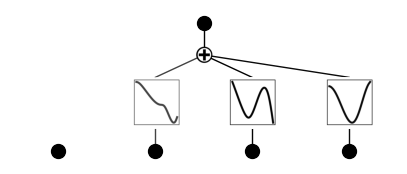

In [44]:
model.plot()

In [45]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.77e-01 | test_loss: 2.04e-01 | reg: 5.56e+00 | : 100%|█| 50/50 [00:14<00:00,  3.50it

saving model version 0.3


{'train_loss': [array(0.17647589),
  array(0.17633476),
  array(0.1764686),
  array(0.17650338),
  array(0.17654313),
  array(0.17636313),
  array(0.17633779),
  array(0.17664904),
  array(0.17660844),
  array(0.17654653),
  array(0.17655009),
  array(0.17659221),
  array(0.17659929),
  array(0.17661696),
  array(0.17660842),
  array(0.17659825),
  array(0.1766132),
  array(0.17660006),
  array(0.17660054),
  array(0.17660724),
  array(0.17660763),
  array(0.17660827),
  array(0.17660915),
  array(0.17660737),
  array(0.17660753),
  array(0.17660735),
  array(0.1766075),
  array(0.17660778),
  array(0.1766055),
  array(0.1766046),
  array(0.17660565),
  array(0.1766068),
  array(0.17660596),
  array(0.17660505),
  array(0.17660756),
  array(0.17660527),
  array(0.17660218),
  array(0.1765983),
  array(0.17660837),
  array(0.17662282),
  array(0.17660331),
  array(0.17661104),
  array(0.17659756),
  array(0.17660201),
  array(0.17661337),
  array(0.17660294),
  array(0.17660464),
  arra

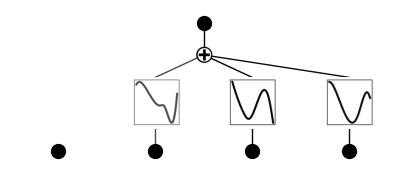

In [46]:
model.plot()

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

predictions = model(dataset['true_test_input']).detach().numpy()

rmse = mean_squared_error(y_test, predictions, squared=False)
mae=mean_absolute_error(y_test, predictions)
r2 = r2_score(dataset['true_test_label'], predictions)

print('rmse: ', rmse)
print('mae: ', mae)
print('r2: ', r2_score)

rmse:  0.22868873262600126
mae:  0.16318609046201707
r2:  <function r2_score at 0x00000211B1087F70>


In [48]:
import importlib
import kan
importlib.reload(kan)

<module 'kan' from 'c:\\Users\\Cyrill\\Documents\\semester_3\\individual_project\\.venv\\lib\\site-packages\\kan\\__init__.py'>

In [ ]:
from kan.utils import SYMBOLIC_LIB
from kan.utils import ex_round


my_symbolics = SYMBOLIC_LIB.copy()
my_symbolics.pop('0')

(<function kan.utils.<lambda>(x)>,
 <function kan.utils.<lambda>(x)>,
 0,
 <function kan.utils.<lambda>(x, y_th)>)

In [50]:
print('here')
model.auto_symbolic(lib=my_symbolics)

here
fixing (0,0,0) with 0
fixing (0,1,0) with x, r2=0.9054094916466376, c=1
fixing (0,2,0) with cos, r2=0.9912822184412589, c=2
fixing (0,3,0) with cos, r2=0.9907963270350327, c=2
saving model version 0.4


In [54]:
model.fit(dataset, steps=50, lamb=0.001)

| train_loss: 1.75e-01 | test_loss: 2.09e-01 | reg: 0.00e+00 | : 100%|█| 50/50 [00:03<00:00, 12.65it

saving model version 0.5


{'train_loss': [array(0.17579548),
  array(0.17563),
  array(0.17560354),
  array(0.17548547),
  array(0.1754655),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  array(0.17546526),
  a

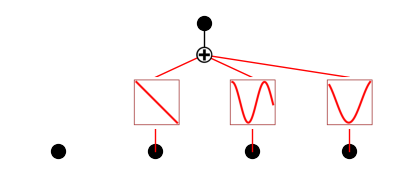

In [55]:
model.plot()

In [56]:
from kan.utils import ex_round
ex_round(model.symbolic_formula()[0][0],2)

-1.56*x_2 - 0.45*cos(7.9*x_3 - 3.09) - 0.74*cos(5.04*x_4 + 10.17) + 1.96